In [29]:
import pandas as pd

# Cargar el archivo con el delimitador correcto
df = pd.read_csv('Tarea2.csv', delimiter=';')

# Eliminar filas con valores nulos
df_cleaned = df.dropna()

# Eliminar filas duplicadas
df_cleaned = df_cleaned.drop_duplicates()

# Mostrar el DataFrame limpio
print(df_cleaned)


      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
5               7.4             0.660         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
1593            6.8             0.620         0.08             1.9      0.068   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [30]:
# Se crea un archivo nuevo limpio 
df_cleaned.to_csv('Tarea2_limpio.csv', index=False, sep=';')


In [31]:
# Generar resumen estadístico de los datos ordenados 
resumen_estadistico = df_cleaned.describe()
print(resumen_estadistico)

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1359.000000       1359.000000  1359.000000     1359.000000   
mean        8.310596          0.529478     0.272333        2.523400   
std         1.736990          0.183031     0.195537        1.352314   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.430000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1359.000000          1359.000000           1359.000000  1359.000000   
mean      0.088124            15.893304             46.825975     0.996709   
std       0.049377            10.447270             33.408946     0.001869   
min       0.012000             1.000000         

In [32]:
# Generar matriz de correlación
matriz_correlacion = df_cleaned.corr()
print(matriz_correlacion)



                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.255124     0.667437   
volatile acidity          -0.255124          1.000000    -0.551248   
citric acid                0.667437         -0.551248     1.000000   
residual sugar             0.111025         -0.002449     0.143892   
chlorides                  0.085886          0.055154     0.210195   
free sulfur dioxide       -0.140580         -0.020945    -0.048004   
total sulfur dioxide      -0.103777          0.071701     0.047358   
density                    0.670195          0.023943     0.357962   
pH                        -0.686685          0.247111    -0.550310   
sulphates                  0.190269         -0.256948     0.326062   
alcohol                   -0.061596         -0.197812     0.105108   
quality                    0.119024         -0.395214     0.228057   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

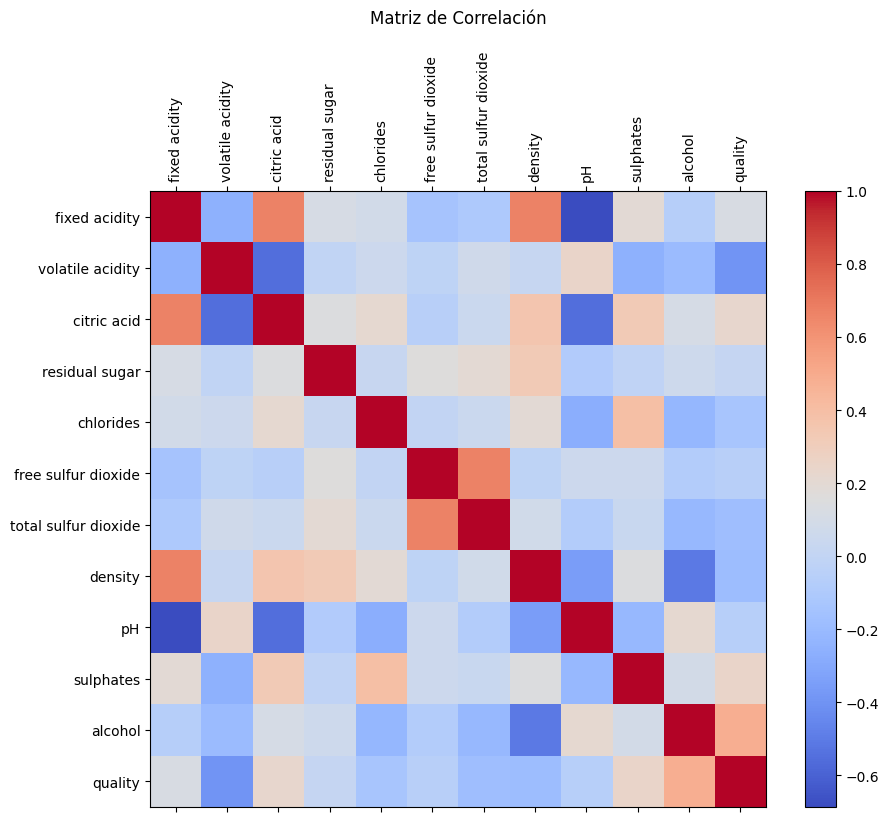

In [33]:
# Graficar la matriz de correlación alternativa
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(matriz_correlacion, cmap='coolwarm')
plt.xticks(range(len(matriz_correlacion.columns)), matriz_correlacion.columns, rotation=90)
plt.yticks(range(len(matriz_correlacion.columns)), matriz_correlacion.columns)
plt.colorbar(cax)
plt.title('Matriz de Correlación', pad=20)
plt.show()




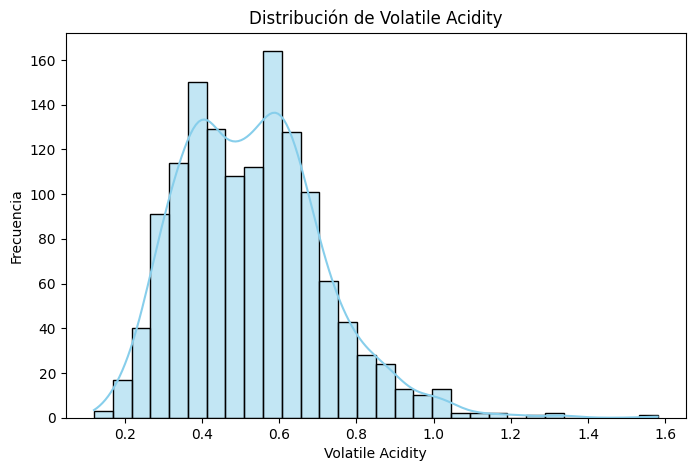

In [34]:

# GRAFICA PARA VOLATIE ACIDITY
import matplotlib.pyplot as plt
import seaborn as sns

# Crear el histograma
plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned['volatile acidity'], bins=30, kde=True, color='skyblue')

# Etiquetas y título
plt.xlabel('Volatile Acidity')
plt.ylabel('Frecuencia')
plt.title('Distribución de Volatile Acidity')

# Mostrar la gráfica
plt.show()


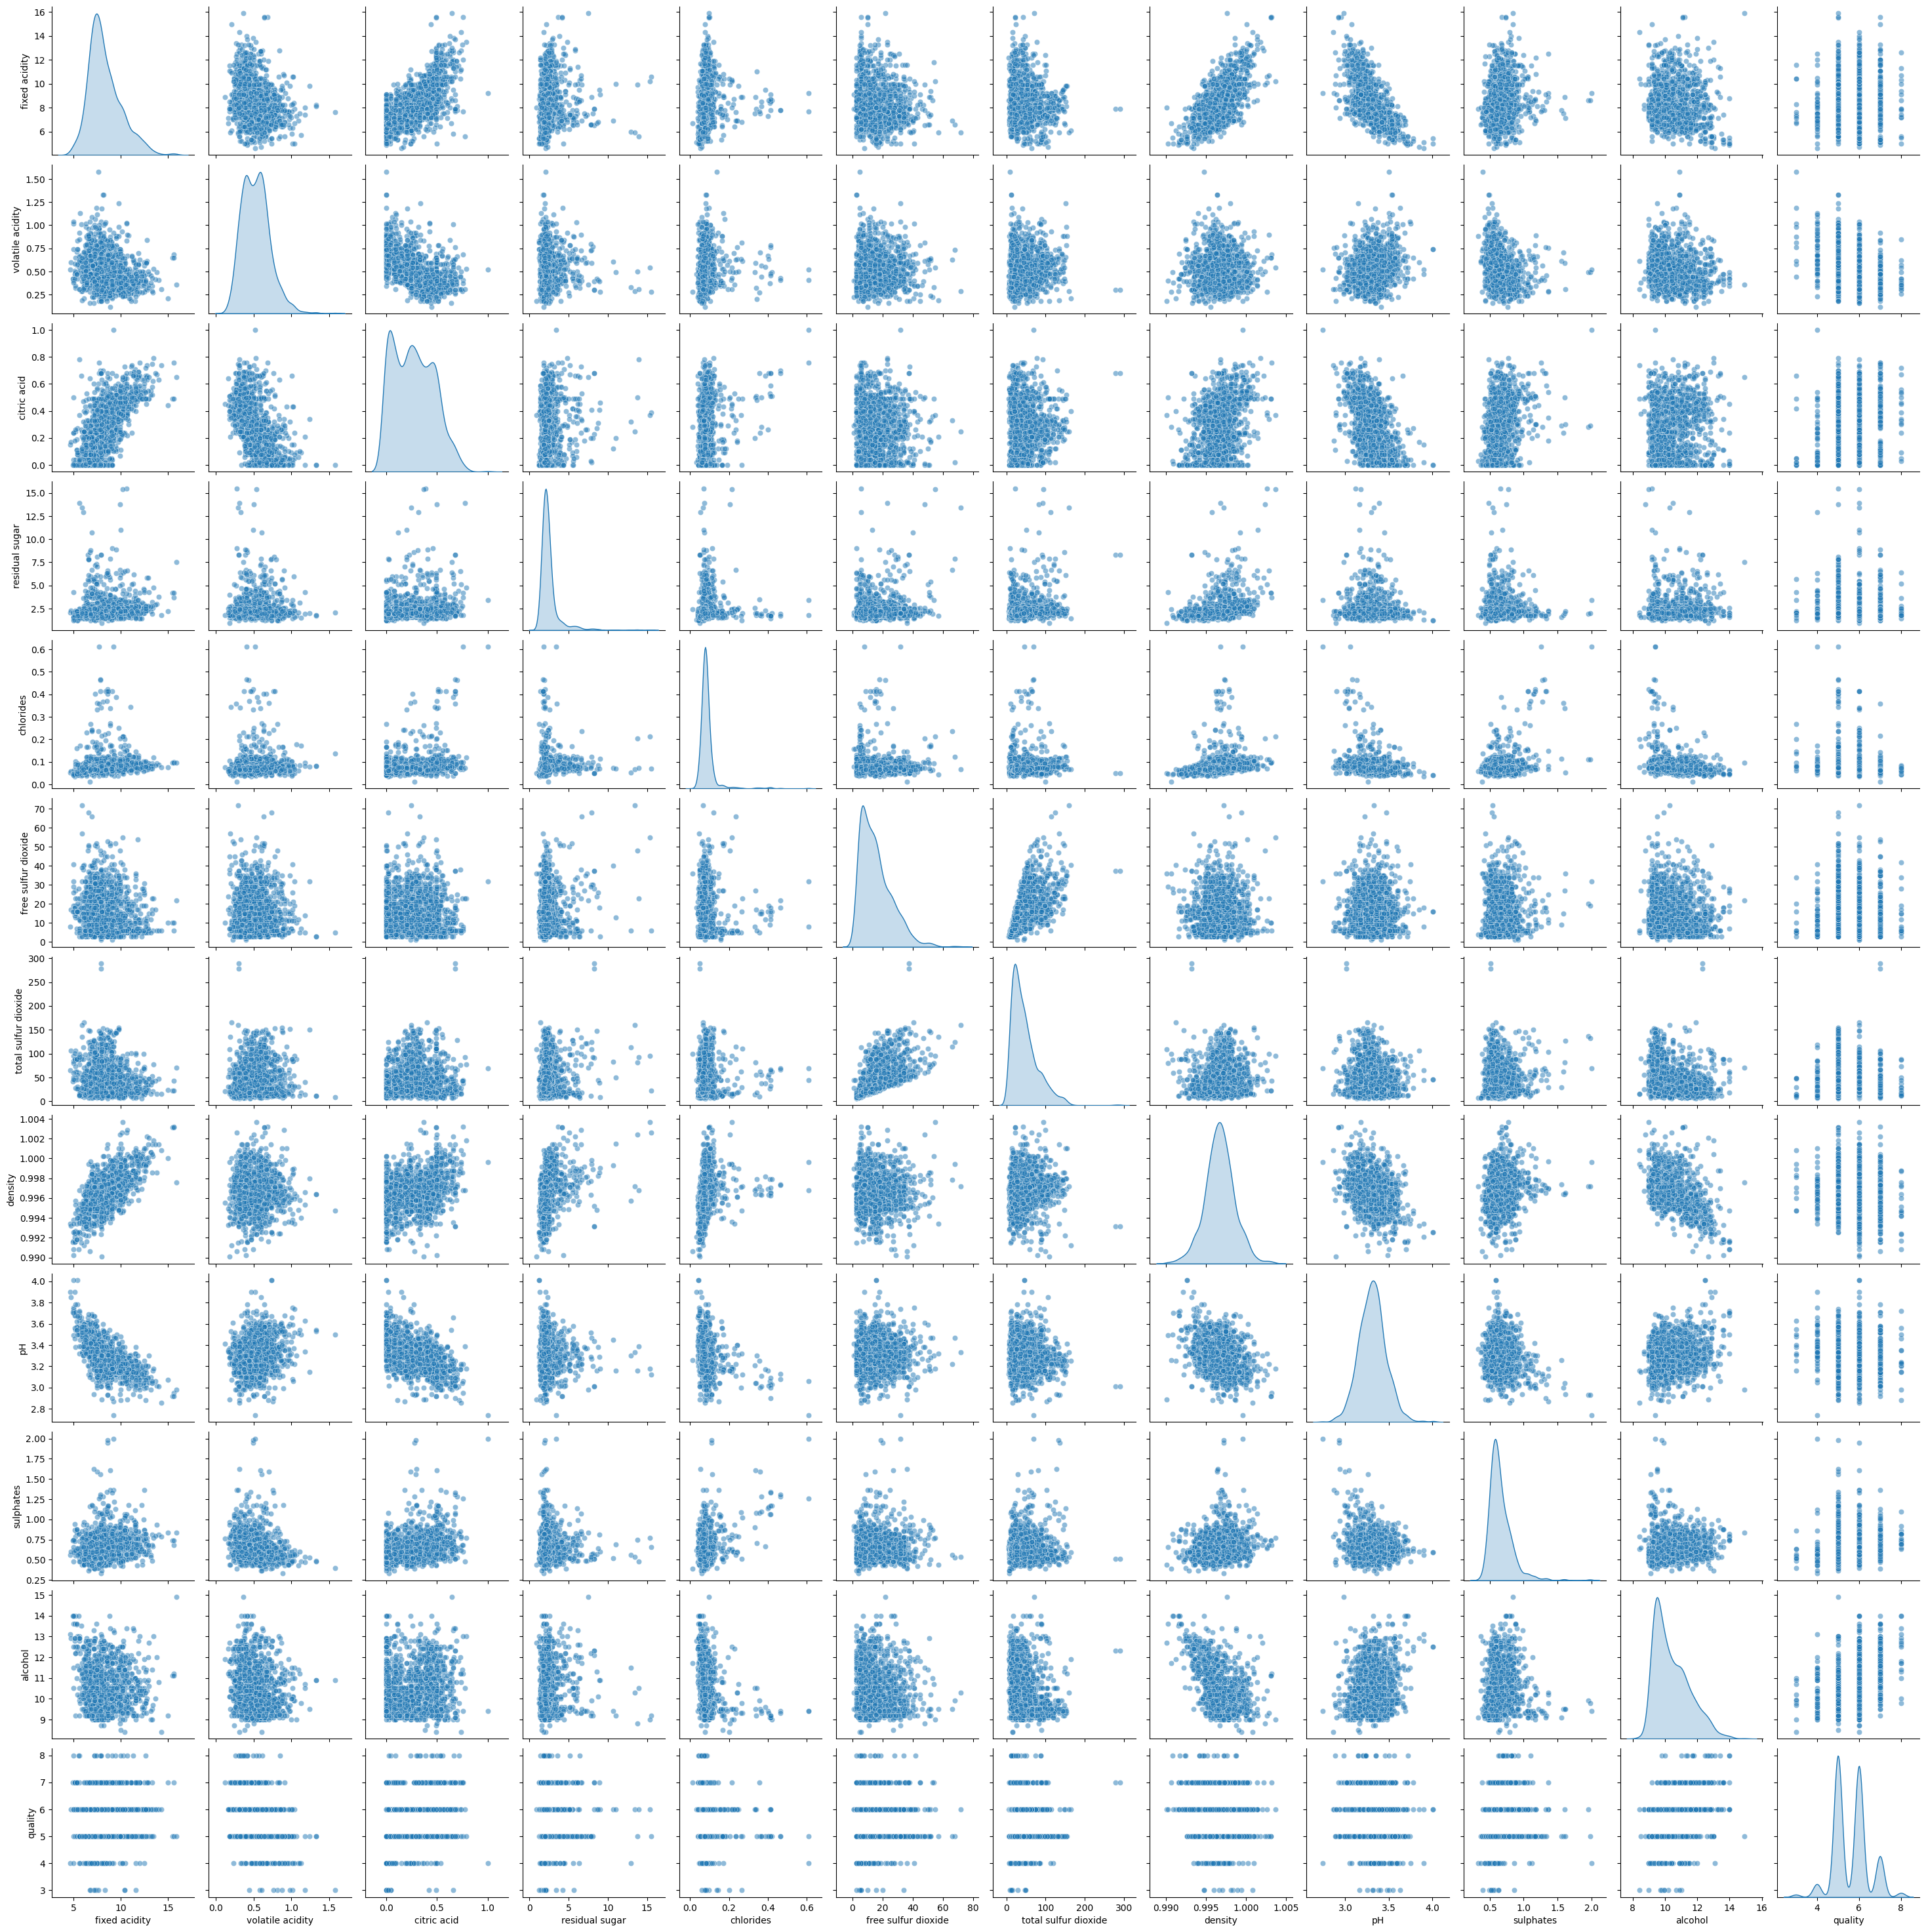

In [35]:
# Grfica general de todo el documento csv 
import seaborn as sns
import matplotlib.pyplot as plt

# Generar el pairplot para todas las variables numéricas
sns.pairplot(df_cleaned, diag_kind="kde", plot_kws={'alpha': 0.5})

# Mostrar la gráfica
plt.show()


C:\Users\xavsc\AppData\Local\Temp\ipykernel_15272\1726547837.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=valores_repetidos.index, y=valores_repetidos.values, palette="viridis")


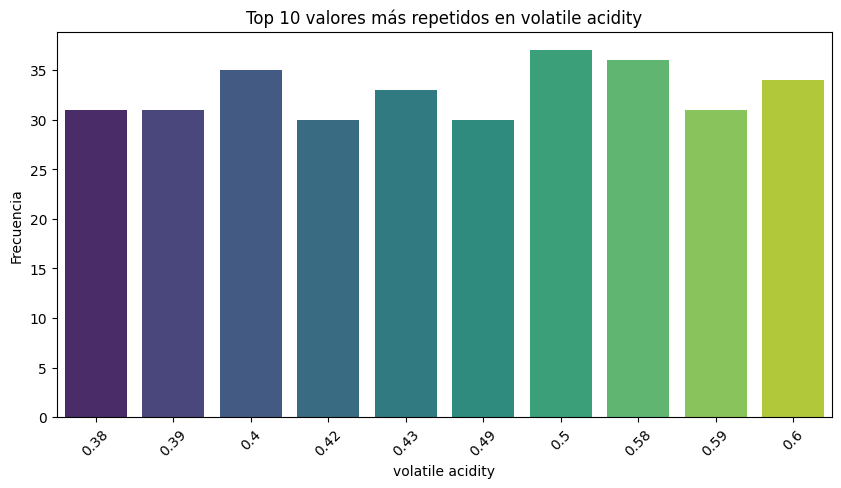

In [36]:
# Grafica para los valores mas repetidos 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Contar las frecuencias de los valores más repetidos en una columna específica
columna = 'volatile acidity'  # Cambia esto si quieres otra columna
valores_repetidos = df_cleaned[columna].value_counts().head(10)  # Top 10 valores más repetidos

# Crear el gráfico de barras
plt.figure(figsize=(10, 5))
sns.barplot(x=valores_repetidos.index, y=valores_repetidos.values, palette="viridis")

# Etiquetas y título
plt.xlabel(columna)
plt.ylabel('Frecuencia')
plt.title(f'Top 10 valores más repetidos en {columna}')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Definir cuántos valores más repetidos queremos mostrar
top_n = 5  # Puedes cambiarlo a 10 o más si deseas

# Crear subgráficos para cada columna
num_columns = len(df_cleaned.columns)
fig, axes = plt.subplots(nrows=num_columns, figsize=(10, num_columns * 4))

# Recorrer todas las columnas y generar gráficos individuales
for i, columna in enumerate(df_cleaned.columns):
    valores_repetidos = df_cleaned[columna].value_counts().head(top_n)  # Obtener los valores más repetidos
    
    sns.barplot(x=valores_repetidos.index, y=valores_repetidos.values, ax=axes[i], palette="viridis")
    
    axes[i].set_title(f'Top {top_n} valores en {columna}')
    axes[i].set_xlabel(columna)
    axes[i].set_ylabel('Frecuencia')
    axes[i].tick_params(axis='x', rotation=45)  # Rotar etiquetas para mejor lectura

# Ajustar espaciado entre gráficos
plt.tight_layout()
plt.show()


C:\Users\xavsc\AppData\Local\Temp\ipykernel_15272\4149563647.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=valores_repetidos.index, y=valores_repetidos.values, ax=axes[i], palette="viridis")
C:\Users\xavsc\AppData\Local\Temp\ipykernel_15272\4149563647.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=valores_repetidos.index, y=valores_repetidos.values, ax=axes[i], palette="viridis")
C:\Users\xavsc\AppData\Local\Temp\ipykernel_15272\4149563647.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=valores_repetidos.index, y=valo

# Conclusiones.

## 1. Calidad de los Datos  
Después de eliminar valores nulos y duplicados, los datos están más limpios y confiables para el análisis. Sin embargo, si se eliminaron muchas filas, podría indicar problemas de calidad en la recolección de datos.  

## 2. Relación entre Variables  
El **heatmap de correlación** mostró qué variables tienen mayor relación entre sí. Por ejemplo:  
- Si **"volatile acidity"** tiene una correlación negativa con la calidad, significa que **valores altos de acidez volátil pueden afectar negativamente la calidad del producto**.  
- Otras variables con correlaciones fuertes pueden indicar factores clave que influyen en el resultado.  

## 3. Tendencias y Valores Más Frecuentes  
El análisis de los **valores más repetidos** en cada columna nos ayuda a identificar tendencias. Por ejemplo:  
- Si ciertos niveles de acidez, pH o alcohol son los más comunes, esto puede indicar un estándar de producción o una tendencia en los datos.  
- Si hay valores que dominan demasiado una columna, puede ser necesario investigar si el dataset está **desbalanceado**.  
